# Secrets in Colab Enterprise

Colab Enterprise allows you to use the Google Cloud Secret Manager and make use of the enterprise-grade feature to store and manage your secrets.

This notebook is part of [this blog](https://blog.prashu.com/using-secrets-with-colab-enterprise-10e44bff87d8).

## Step 1
To use it, you first have to create your secret in Google Cloud Secret Manager.

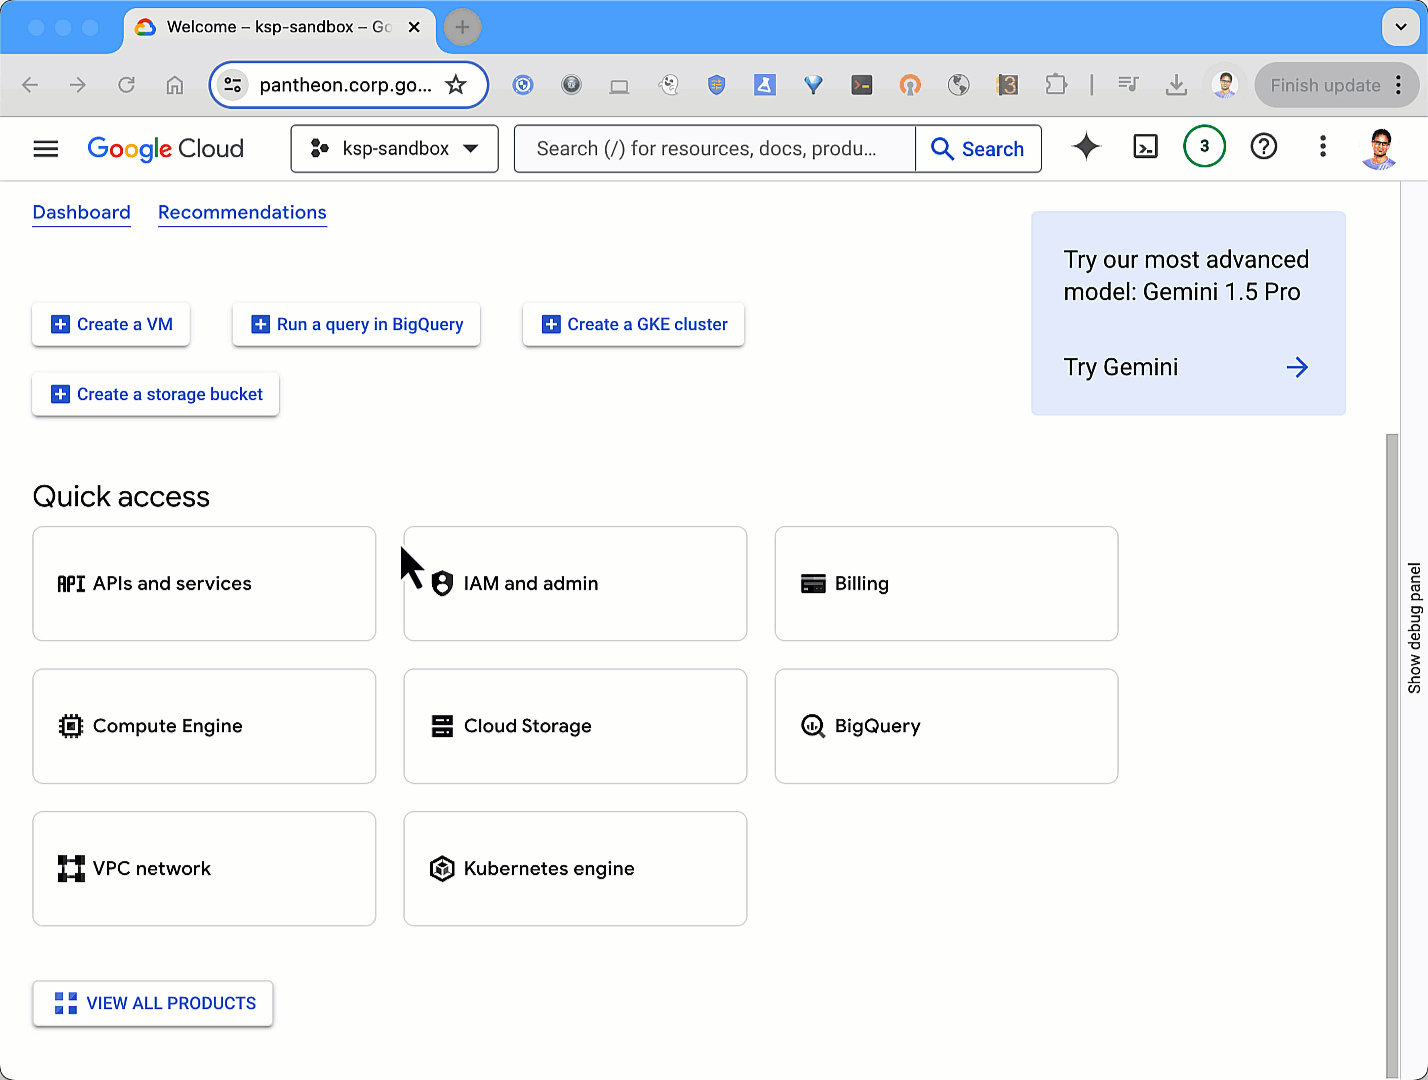

## Step 2
Then you copy the resource name of the secret so that you can use it wherever you like.

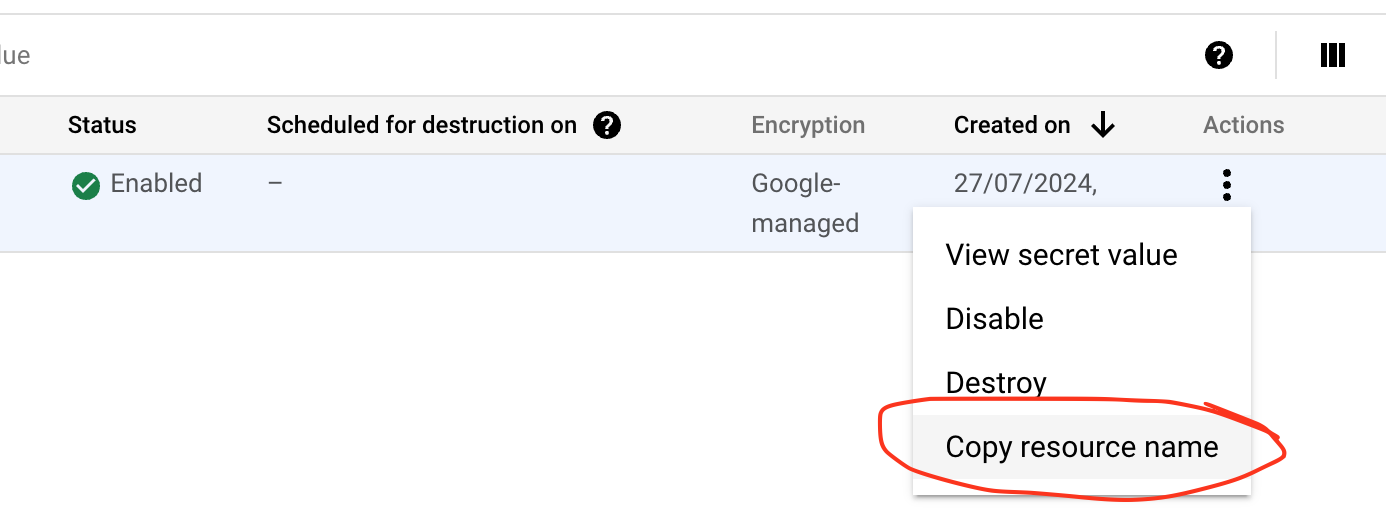

## Step 3

Finally we instantiate the required SDK to access the secret and then use it in our code.

Note: Remember to install the relevant packages since your runtime might not have it by default. Restart your session once you install the package.

Refer the documentation on how to create and acess secrets using the client libraries for various languages here.

[Link to docs](https://cloud.google.com/secret-manager/docs/reference/libraries#client-libraries-usage-python)

In [ ]:
!pip install google-cloud-secret-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 3.2 MB/s eta 0:00:00


### Start from here if you have restarted the colab runtime / session after installing the google-cloud-* packages



### Step 3a
Btw, the below code might have failed if you tried to run it on Colab rather than Colab Enterprise. This is because Colab Enterprise automatically uses the signed-in credentials to access the Secret Manager.

If you want to use it from Colab, then you'll need to authenticate with Google Cloud. The below code will help determine where you are running and execute the cell accordingly.

In [ ]:
# Check the current environment
import os

if os.environ.get('COLAB_BACKEND_VERSION') is not None:
  # this is running on Colab (free) (?)

  # Authenticate user to google cloud with your current credentials
  from google.colab import auth
  auth.authenticate_user()
  print("Authenticated")


Authenticated


In [ ]:
# Import the Secret Manager client library.
from google.cloud import secretmanager

# Create the Secret Manager client.
client = secretmanager.SecretManagerServiceClient()

# Access the secret version.
response = client.access_secret_version(request={"name": "projects/983088720198/secrets/secret_secret/versions/1"})

In [ ]:
# bad bad... don't do this!
print(response.payload.data.decode("UTF-8"))

Shhh...!!!


In [ ]:
# just a dummy function
def use_the_secret_to_do_stuff(name: str, secret: str):
  print(f"You are authorised, {name}!")
  pass

# call a function that needs the secret
use_the_secret_to_do_stuff("Bob", response.payload.data)

You are authorised, Bob!
